Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Loading Dataset

In [2]:
df = pd.read_csv('students.csv')

Analysing first 10 rows of the dataset

In [3]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


dimensions of the dataframe

In [4]:
df.shape

(1000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


checking for missing values

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

No missing values

### Independent variables (X):
- gender	
- race/ethnicity	
- parental level of education	
- lunch	
- test preparation course

### Dependent Variables (y): 
- math score
- reading score
- writing score

Splitting data into independent and dependent variables

In [7]:
X = df.iloc[:, :5]
y = df.iloc[:, 5:]

One hot encoding of categoricals, because the dataset is not numerical which the LinReg requires.

In [15]:
X_encoded = pd.get_dummies(X, drop_first=True)

Train/test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.20, random_state=42)

Importing Linear regression from SKlearn

In [17]:
from sklearn.linear_model import LinearRegression

Creating Linear regression object

In [18]:
model = LinearRegression()

Training data

In [19]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


coefficient and intercept

In [20]:
print("Coefficient: ", model.coef_)
print('Intercept: ', model.intercept_)

Coefficient:  [[  4.52071436   0.18236164   0.60287307   3.6121319    9.07793455
    3.11905066  -4.09050311   1.07460497  -0.14500768  -2.8963916
   11.52399662  -5.87451315]
 [ -7.413715    -0.53033641   0.67421621   2.81201253   4.48485725
    3.10066528  -4.3739683    1.91766355  -1.24275402  -2.78641923
    7.46552553  -7.57118002]
 [ -9.38256558  -0.07151826   1.47671481   4.91842836   4.31784439
    4.28658935  -5.50641655   2.79291268  -1.17454708  -4.1361769
    8.63344211 -10.18740212]]
Intercept:  [59.09191593 72.78384472 72.94888396]


### Coefficient
This is the slope which tells how much each independent feature(dummy variable) changes the predicted output

### Intercept
This is the score when all dummies are set to 0. This can also be interpreted as the baseline score<br><br>

coef_ shape is (3, n_dummies), i.e. row 0 = math score slopes, row 1=reading and row 2 = writing.<br>
each col corresponds to one dummy (independent feature)

## Predicting test data

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([[65.34427246, 73.35240644, 72.87163876],
       [59.12926988, 71.01075429, 71.70281862],
       [75.99329632, 71.17715305, 71.21737607],
       [58.19598252, 57.23041189, 53.68108398],
       [84.06955378, 76.07775848, 75.34305779],
       [61.35024904, 60.61096223, 58.29734461],
       [63.79499192, 64.83979331, 63.49480011],
       [67.90188258, 76.93261461, 77.3746309 ],
       [58.3409902 , 58.47316591, 54.85563106],
       [72.42259694, 69.51889961, 67.99206532],
       [53.64761403, 53.4249814 , 47.8724997 ],
       [75.44365671, 66.96291325, 62.19402585],
       [55.18377446, 67.87954001, 67.37094914],
       [56.68452699, 66.78192322, 66.50536312],
       [78.60375112, 74.40491376, 75.94364176],
       [71.33165284, 80.27496355, 82.36457753],
       [68.78374255, 63.70251947, 61.42437017],
       [64.4692997 , 63.71162752, 62.58393396],
       [65.4571397 , 72.70378354, 72.1771754 ],
       [56.82953468, 68.02467724, 67.6799102 ],
       [70.9395918 , 67.85635499, 66.281

Plotting

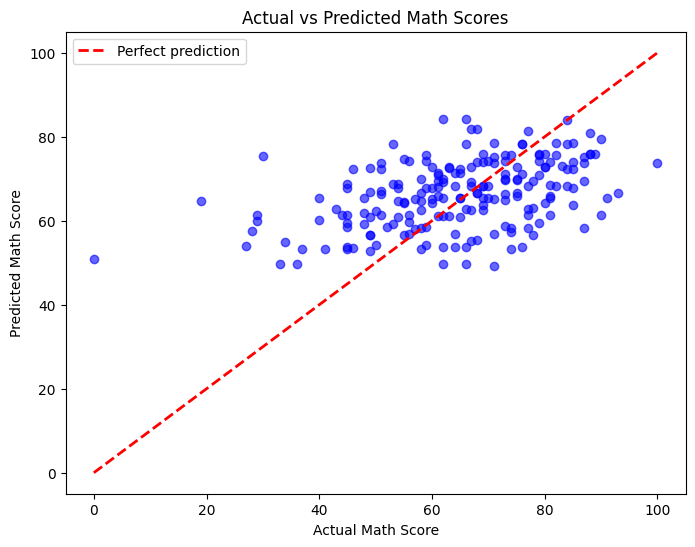

In [24]:
actual = y_test.iloc[:, 0]  # actual math scores
predicted = y_pred[:, 0]    # predicted math scores

plt.figure(figsize=(8,6))
plt.scatter(actual, predicted, alpha=0.6, color='blue')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 
         'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Math Score')
plt.ylabel('Predicted Math Score')
plt.title('Actual vs Predicted Math Scores')
plt.legend()
plt.show()

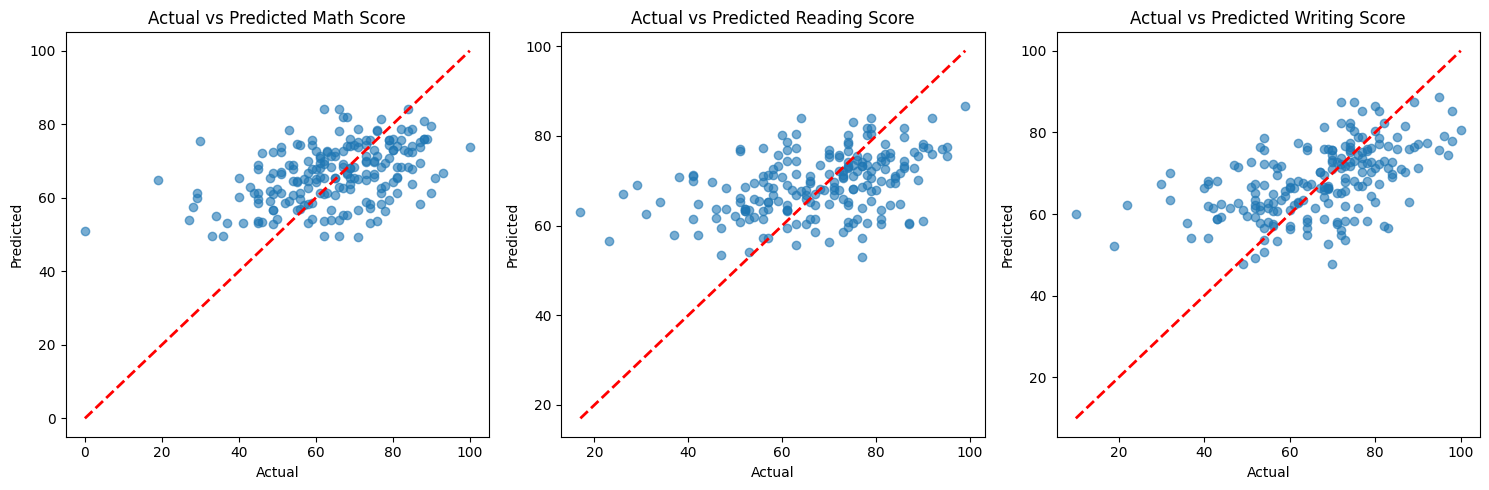

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))  # setting size of plot

targets = ['Math Score', 'Reading Score', 'Writing Score']
# plotting for each target
for i in range(3):
    axes[i].scatter(y_test.iloc[:, i], y_pred[:, i], alpha=0.6)
    axes[i].plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 
                 [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()], 'r--', lw=2)
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')
    axes[i].set_title(f'Actual vs Predicted {targets[i]}')

plt.tight_layout()
plt.show()


Here the red dotted line shows the perfect prediction and points close to the line are good predictions.

# Evaluation of model

In [26]:
from sklearn.metrics import mean_absolute_error, r2_score

In [28]:
# for all 3 scores

dic = {0: 'math',
       1: 'reading',
       2: 'writing'}

for i in range(0, 3):
    print(f'Mean absolute error of {dic.get(i)} score: ', mean_absolute_error(y_test.iloc[:, i], y_pred[:, i]))
    print(f'R2 of {dic.get(i)} score: ', r2_score(y_test.iloc[:, i],y_pred[:, i]))

Mean absolute error of math score:  11.269872775277623
R2 of math score:  0.17599998338251166
Mean absolute error of reading score:  10.830287958543588
R2 of reading score:  0.15939617857969446
Mean absolute error of writing score:  10.193142948785425
R2 of writing score:  0.26373587906757556


The model is obviously not performing well.<br>
- MAE is off by around 10 points which is not good. The lower MAE, the better
- R2 score is also very low. R2 scores nearing 1 (>0.8) are usually considered good.